In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
df = pd.read_csv('ml.csv', sep=';')
y = df['price']
X = df.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lasso 1. Degree

In [2]:
results_lasso = []
degree=1
# Creating polynomial features
alphas_to_test = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

# Standardizing the data
scaler = StandardScaler()
X_poly_train = scaler.fit_transform(X_poly_train)
X_poly_test = scaler.transform(X_poly_test)

# Training Lasso regression with max_iter=5000
model = LassoCV(alphas=alphas_to_test, max_iter=10000, cv=5, n_jobs=-1)
#model = Lasso(max_iter=5000, cv=5)
model.fit(X_poly_train, y_train)

# Predictions
y_pred = model.predict(X_poly_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results_lasso.append([degree, mse, rmse, mae, r2, model.alpha_])  # Report alpha



In [3]:
d = {'test 1':y_test, 'prediction 1':y_pred}
df = pd.DataFrame(d)
df

,test 1,prediction 1
1448,4495000.0,4.745477e+06
11832,5195000.0,6.740743e+06
10949,2995000.0,2.508460e+06
15609,6100000.0,6.174127e+06
15723,4395000.0,3.733488e+06
...,...,...
2856,10700000.0,7.627375e+06
16518,3500000.0,5.116670e+06
1135,1295000.0,3.053549e+06
13241,565000.0,4.422869e+05


Text(29.000000000000007, 0.5, 'Predicted Values')

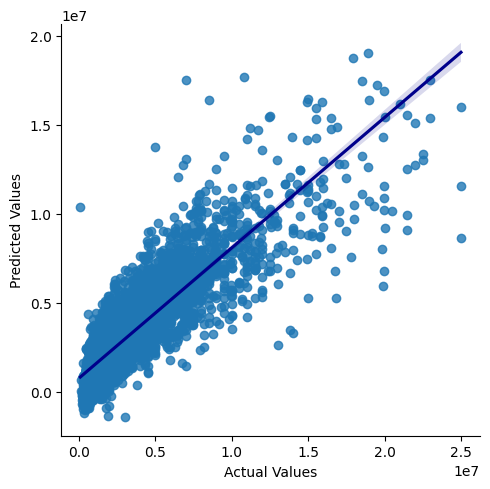

In [4]:
# Plot actual vs predicted values
# plt.scatter(y_test, y_pred, label=f"Polynomial {degree}")

# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs Predicted values')
# plt.legend()

# plt.show()

sns.lmplot(data=df,x='test 1', y='prediction 1',line_kws={'color': 'darkblue'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

   Polynomial Degree           MSE          RMSE            MAE        R2  \
0                  1  1.894534e+12  1.376421e+06  839010.216534  0.748077   

    Alpha  
0  1000.0  


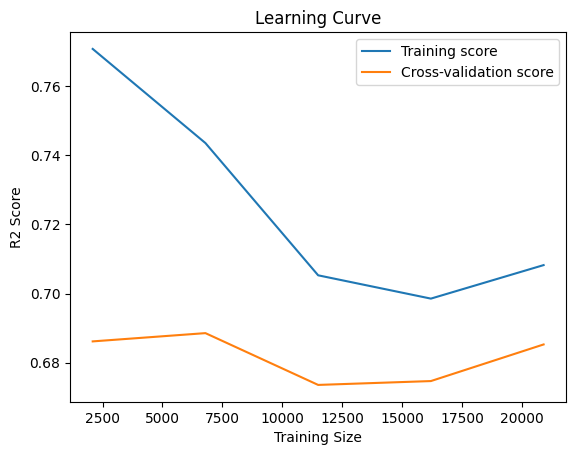

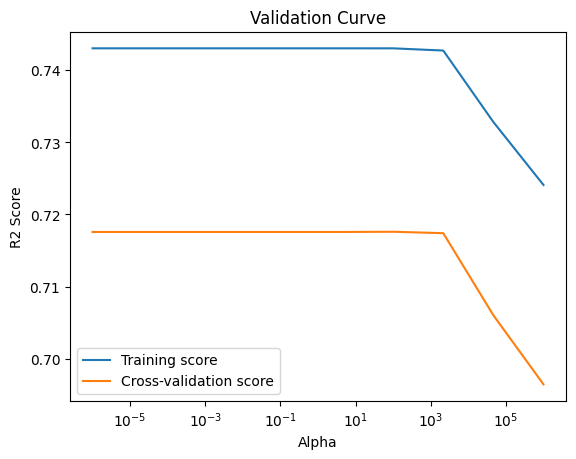

In [5]:
# Tabulate results
results_df = pd.DataFrame(results_lasso, columns=['Polynomial Degree', 'MSE', 'RMSE', 'MAE', 'R2', 'Alpha'])
print(results_df)

# Plot learning curve with n_jobs=-1
train_sizes, train_scores, test_scores = learning_curve(LassoCV(max_iter=10000), X, y, cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

# Plot validation curve with n_jobs=-1
param_range = np.logspace(-6, 6, 10)
train_scores, test_scores = validation_curve(Lasso(max_iter=10000), X, y, param_name="alpha", param_range=param_range, cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(param_range, train_mean, label='Training score')
plt.plot(param_range, test_mean, label='Cross-validation score')
plt.title('Validation Curve')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.show()



# Lasso 2. Degree

In [6]:
results_lasso = []
degree=2
# Creating polynomial features
alphas_to_test = np.logspace(-8, 8, 10)
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

# Standardizing the data
scaler = StandardScaler()
X_poly_train = scaler.fit_transform(X_poly_train)
X_poly_test = scaler.transform(X_poly_test)

# Training Lasso regression with max_iter=5000
model = LassoCV(alphas=alphas_to_test, max_iter=10000, cv=5, n_jobs=-1)
#model = Lasso(max_iter=5000, cv=5)
model.fit(X_poly_train, y_train)

# Predictions
y_pred = model.predict(X_poly_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results_lasso.append([degree, mse, rmse, mae, r2, model.alpha_])  # Report alpha



c:\Users\Augus\code\Data\venv_jupyter\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3640579452967642.0, tolerance: 10127193020366.297
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Augus\code\Data\venv_jupyter\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3020190247312504.0, tolerance: 10104841536086.541
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Augus\code\Data\venv_jupyter\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2852502666563602.0, tolerance: 10230896837216.746
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Augus\code\Data\venv_jupyter\lib\site-pa

In [ ]:
e = {'test 2':y_test, 'prediction 2':y_pred}
df = df.assign(*e)
df

In [ ]:
# Plot actual vs predicted values
# plt.scatter(y_test, y_pred, label=f"Polynomial {degree}")

# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs Predicted values')
# plt.legend()

# plt.show()

sns.lmplot(data=df,x='test 2', y='prediction 2',line_kws={'color': 'darkblue'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [ ]:
# Tabulate results
results_df = pd.DataFrame(results_lasso, columns=['Polynomial Degree', 'MSE', 'RMSE', 'MAE', 'R2', 'Alpha'])
print(results_df)

# Plot learning curve with n_jobs=-1
train_sizes, train_scores, test_scores = learning_curve(LassoCV(max_iter=10000), X, y, cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

# Plot validation curve with n_jobs=-1
param_range = np.logspace(-6, 6, 10)
train_scores, test_scores = validation_curve(Lasso(max_iter=10000), X, y, param_name="alpha", param_range=param_range, cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(param_range, train_mean, label='Training score')
plt.plot(param_range, test_mean, label='Cross-validation score')
plt.title('Validation Curve')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.show()



# Lasso 3. Degree

In [ ]:
results_lasso = []
degree=3
# Creating polynomial features
alphas_to_test = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

# Standardizing the data
scaler = StandardScaler()
X_poly_train = scaler.fit_transform(X_poly_train)
X_poly_test = scaler.transform(X_poly_test)

# Training Lasso regression with max_iter=5000
model = LassoCV(alphas=alphas_to_test, max_iter=10000, cv=5, n_jobs=-1)
#model = Lasso(max_iter=5000, cv=5)
model.fit(X_poly_train, y_train)

# Predictions
y_pred = model.predict(X_poly_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results_lasso.append([degree, mse, rmse, mae, r2, model.alpha_])  # Report alpha



In [ ]:
f = {'test 3':y_test, 'prediction 3':y_pred}
df = df.assign(**f)
df

In [ ]:
# Plot actual vs predicted values
# plt.scatter(y_test, y_pred, label=f"Polynomial {degree}")

# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs Predicted values')
# plt.legend()

# plt.show()

sns.lmplot(data=df,x='test 3', y='prediction 3',line_kws={'color': 'darkblue'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [ ]:
# Tabulate results
results_df = pd.DataFrame(results_lasso, columns=['Polynomial Degree', 'MSE', 'RMSE', 'MAE', 'R2', 'Alpha'])
print(results_df)

# Plot learning curve with n_jobs=-1
train_sizes, train_scores, test_scores = learning_curve(LassoCV(max_iter=10000), X, y, cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

# Plot validation curve with n_jobs=-1
param_range = np.logspace(-6, 6, 10)
train_scores, test_scores = validation_curve(Lasso(max_iter=10000), X, y, param_name="alpha", param_range=param_range, cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(param_range, train_mean, label='Training score')
plt.plot(param_range, test_mean, label='Cross-validation score')
plt.title('Validation Curve')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.show()



### Plots

# Ridge

### Plots

# Elastic Net


### Plots